In [150]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set()

In [75]:
spe_df = pd.read_csv('/home/bsherrod/py/diatoms/spongotrocus_glacialis.csv', sep=',', index_col='site')
spe_df['log_abund'] = spe_df['abundance'].apply(np.log)
spe_df.head()

,abundance,temp,log_abund
site,,,
1,12,0.8,2.484907
2,14,1.1,2.639057
3,13,1.6,2.564949
4,22,1.8,3.091042
5,18,1.7,2.890372


In [25]:
# let's first fit 2nd order polynomial with OLS with intercept
#olsres2 = sm.ols(formula = 'y ~ x + I(x**2)', data = data).fit() EXAMPLE
mod = smf.ols(formula = 'log_abund ~ temp + I(temp**2)', data = spe_df).fit()

In [26]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:              log_abund   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     47.68
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           3.48e-10
Time:                        11:58:12   Log-Likelihood:                -7.3223
No. Observations:                  34   AIC:                             20.64
Df Residuals:                      31   BIC:                             25.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1192      0.133     15.950   

In [30]:
# predicted values of log_abund using 2nd order polynomial model results
pred2 = mod.predict(spe_df) # predict with the fitted model

(0, 6)

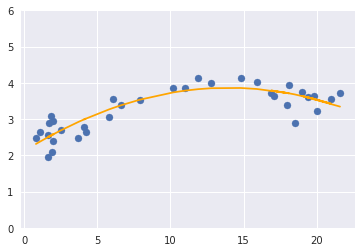

In [47]:
plt.scatter(spe_df['temp'],spe_df['log_abund'])
plt.plot(spe_df['temp'],pred2[0:], 'orange')
plt.ylim(0, 6)

In [68]:
#calculate the optimum, tolernace, and maximum from the OLS results

# regression coefficients from regression results
#mod.params[0] = b0
#mod.params[1] = b1
#mod.params[2] = b2

optimum = -mod.params[1] / (2*mod.params[2])
tolerance = 1 / np.sqrt(-2 * mod.params[2])
maximum = mod.params[0] + (mod.params[1] * optimum) + (mod.params[2] * (optimum**2))
optimum, tolerance, maximum

(13.97367388146532, 7.4803045040825022, 3.8639867296540094)

In [144]:
# variance estimates from regression
mod.normalized_cov_params

,Intercept,temp,I(temp ** 2)
Intercept,0.178694,-0.039551,0.001600
temp,-0.039551,0.012847,-0.000577
I(temp ** 2),0.001600,-0.000577,0.000027


In [159]:
# calculate 95% CI for optimum

# get t statistic for n-3 df 
t_inf = stats.t.ppf(1-0.025, (len(spe_df.index) - 3))

v11 = mod.normalized_cov_params.iloc[0][0] # variance of b1
v22 = mod.normalized_cov_params.iloc[1][1] # variance of b2
v12 = mod.normalized_cov_params.iloc[2][1] # covariance between b1 and b2





In [116]:
# calculate weighted average
spe_df['abXtemp'] = spe_df['abundance'] * spe_df['temp']
spe_df['log_abXtemp'] = spe_df['log_abund'] * spe_df['temp']
spe_df.head()

,abundance,temp,log_abund,abXtemp,log_abXtemp
site,,,,,
1,12,0.8,2.484907,9.6,1.987925
2,14,1.1,2.639057,15.4,2.902963
3,13,1.6,2.564949,20.8,4.103919
4,22,1.8,3.091042,39.6,5.563876
5,18,1.7,2.890372,30.6,4.913632


In [90]:
WA = spe_df['abXtemp'].sum() / spe_df['abundance'].sum()
WA_log = spe_df['log_abXtemp'].sum() / spe_df['log_abund'].sum()
WA, WA_log


(12.65739299610895, 11.030918658822136)

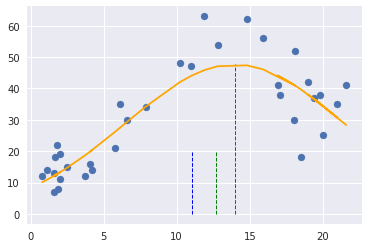

In [109]:
plt.scatter(spe_df['temp'],spe_df['abundance'])
plt.plot(spe_df['temp'],np.exp(pred2[0:]), 'orange')
plt.vlines(optimum, 0, np.exp(maximum), 'red', linestyles='dashed', linewidth = 1)
plt.vlines(WA, 0, 20, 'green', linestyles='dashed', linewidth = 1)
plt.vlines(WA_log, 0, 20, 'blue', linestyles='dashed', linewidth = 1)
